In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [96]:
def importance_choice(i):
    print(f'Rate Importance of {i.upper()}:  (0-->20 high or exit=999)')
    a = int(input())                        # add sanitizer for string inputs.  switch: if a==string, please try again, call function
    if a > -1 and a < 21:                   
        return a
    elif (a==999):
        print("thank you")
        return a
    else: 
        print("please try again")
        importance_choice(i)

def urgency_choice(i):
    print(f'Rate Urgency of {i.upper()}:  (0-->20 high or exit=999)')
    b = int(input())
    if b > -1 and b < 21:
        return b
    elif (b==999):
        print("thank you")
        return b
    else: 
        print("please try again")
        urgency_choice(i)

In [101]:
# create list of projects stressing you
stressors=[]

def list_stressors():
    print("What is stressing you out?  exit=999")
    x = str(input())
    if x == "999":
        print("thank you")
    else: 
        if x == "":
            print("*** Please enter a value.  Or enter 999 to exit ***")
            list_stressors()
        else: 
            stressors.append(x)
            list_stressors()
            
list_stressors()

What is stressing you out?  exit=999
What is stressing you out?  exit=999
What is stressing you out?  exit=999
What is stressing you out?  exit=999
What is stressing you out?  exit=999
What is stressing you out?  exit=999
thank you


In [102]:
# converts to numpy array for pandas DF later
projects = np.array(stressors)

In [103]:
# weigh Importance vs Urgency (table 1-20)

#initiate arrays for 0-20 rating
importance = np.zeros(projects.size, dtype=int)
urgency = np.zeros(projects.size, dtype=int)

# iterator below this.  
counter=0
for i in projects: 
    a = importance_choice(projects[counter])      # if a==999, break.  don't go to b=funtion()
    b = urgency_choice(projects[counter])
    if a==999 or b==999:
        print("please restart")
        break
    else:
        importance[counter]=a
        urgency[counter]=b
        counter+=1
        continue

Rate Importance of REACT:  (0-->20 high or exit=999)
Rate Urgency of REACT:  (0-->20 high or exit=999)
Rate Importance of CSS:  (0-->20 high or exit=999)
Rate Urgency of CSS:  (0-->20 high or exit=999)
Rate Importance of DSTRUCTS:  (0-->20 high or exit=999)
Rate Urgency of DSTRUCTS:  (0-->20 high or exit=999)
Rate Importance of COOKING:  (0-->20 high or exit=999)
Rate Urgency of COOKING:  (0-->20 high or exit=999)
Rate Importance of VOLUNTEERING:  (0-->20 high or exit=999)
Rate Urgency of VOLUNTEERING:  (0-->20 high or exit=999)


In [105]:
# construct dataframe

data = {"Importance": importance, "Urgency": urgency}
df = pd.DataFrame(data=data, index=projects)

In [106]:
df.head()

,Importance,Urgency
react,18,18
css,10,10
dstructs,15,8
cooking,20,20
volunteering,18,11


((0, 21), (0, 21))

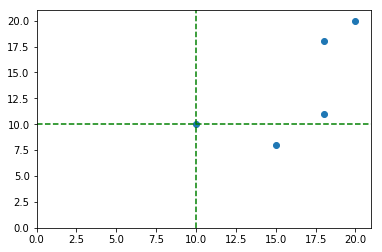

In [107]:
# graph df in scatterplot.  x = Importance, y = Urgency.  points = Projects (index on this column?)

plt.plot(df['Importance'], df['Urgency'], 'o', label='Inline label')

plt.plot((0,21),(10,10), 'g--')
plt.plot((10,10), (0,21), 'g--')
plt.xlim(0,21), plt.ylim(0,21)

In [108]:
# pick top 3 from top-right quadrant

top_projects = df[df[["Importance", "Urgency"]]>10].dropna()
print(top_projects.sort_values(by="Urgency", ascending=False))

              Importance  Urgency
cooking             20.0     20.0
react               18.0     18.0
volunteering        18.0     11.0


In [ ]:
# project 1:  dependencies, impact of completion, impact of neglect, resources needed

In [ ]:
# project 2:  dependencies, impact of completion, impact of neglect, resources needed

In [ ]:
# project 3:  dependencies, impact of completion, impact of neglect, resources needed

In [ ]:
# summarize and compare projects

In [ ]:
# top project tiniest next steps